In [0]:
!pip install qiskit

     |████████████████████████████████| 2.7MB 4.9MB/s 
     |████████████████████████████████| 18.2MB 129kB/s 
     |████████████████████████████████| 92kB 7.6MB/s 
     |████████████████████████████████| 102kB 11.3MB/s 
     |████████████████████████████████| 983kB 55.2MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 5.6MB 32.7MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 71kB 8.9MB/s 
     |████████████████████████████████| 573kB 41.6MB/s 
     |████████████████████████████████| 21.7MB 108kB/s 
     |████████████████████████████████| 2.3MB 29.6MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
  Created wheel for qiskit: filename=qiskit-0.14.0-cp36-none-any.whl size=1400 sha256=14ed1360fdcb8a3d7544c66ed1fc32addfa34f9cc5c27b25676378dd147eb250
  Stored in directory: /root/.cache/pip/wheels/78/56/d2/194c8ea4c20e67c474027d

In [0]:
import qiskit as q

In [0]:
IBMQ.save_account('My_API_Token')

In [0]:
IBMQ.load_account()

/usr/local/lib/python3.6/dist-packages/qiskit/providers/models/backendconfiguration.py:337: UserWarning: `dt` and `dtm` now have units of seconds(s) rather than nanoseconds(ns).
  warnings.warn('`dt` and `dtm` now have units of seconds(s) rather '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [0]:
IBMQ.active_account()
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [0]:
from qiskit.tools.jupyter import *

In [0]:
from qiskit.tools.monitor import job_monitor

In [0]:
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
        
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

ibmq_qasm_simulator has 1 queued and simulated qubits
ibmqx2 has 11 queued and 5 qubits
ibmq_16_melbourne has 4 queued and 14 qubits
ibmq_vigo has 38 queued and 5 qubits
ibmq_ourense has 26 queued and 5 qubits
ibmq_london has 24 queued and 5 qubits
ibmq_burlington has 15 queued and 5 qubits
ibmq_essex has 15 queued and 5 qubits
ibmq_armonk has 0 queued and 1 qubits


In [0]:

backend = provider.get_backend("ibmq_16_melbourne")
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

NameError: ignored

In [0]:

circuit = q.QuantumCircuit(2,2)  # 2 qubits, 2 classical bits 
circuit.x(0) # "x" is a "not" gate. It flips the value. Starting value is a 0, so this flips to a 1. 
circuit.cx(0, 1) #cnot, controlled not, Flips 2nd qubit's value if first qubit is 1
circuit.measure([0,1], [0,1])





backend = provider.get_backend("ibmq_16_melbourne")
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)


IBMQBackendError: ignored

In [0]:
IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [0]:
back = provider.get_backend("ibmq_burlington")
job = q.execute(circuit, backend=back, shots=500)
job_monitor(job)

Job Status: job has successfully run


In [0]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

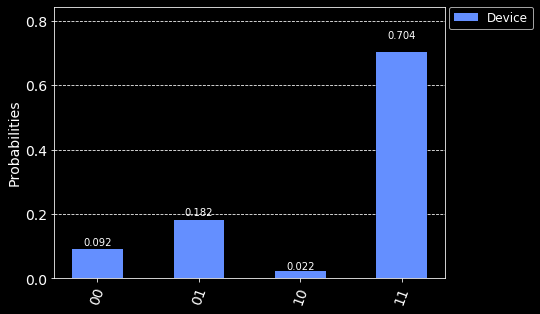

In [0]:
from qiskit.visualization import plot_histogram
from matplotlib import style

style.use("dark_background") # I am using dark mode notebook, so I use this to see the chart.

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts], legend=['Device'])